# 425 HW2
## Yusong Chen 306315424

## Problem 3 This problem uses the Weekly.csv dataset (uploaded on Bruinlearn) containing 1089 weekly stock returns for 21 years.


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Use the full dataset to fit a logistic regression of today’s stock movement (up or down) on the five lags of returns and the trading volume.

In [2]:
df = pd.read_csv('Weekly.csv')
df.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
1088,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


In [3]:
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']] 
y = df['Direction'] 

In [4]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

## 2. Calculate the confusion matrix, accuracy, precision, recall, and F1 score for the in-sample predic- tions. Does the model uniformly beat random guessing in terms of these performance metrics?

In [5]:
y_pred = model.predict(X)

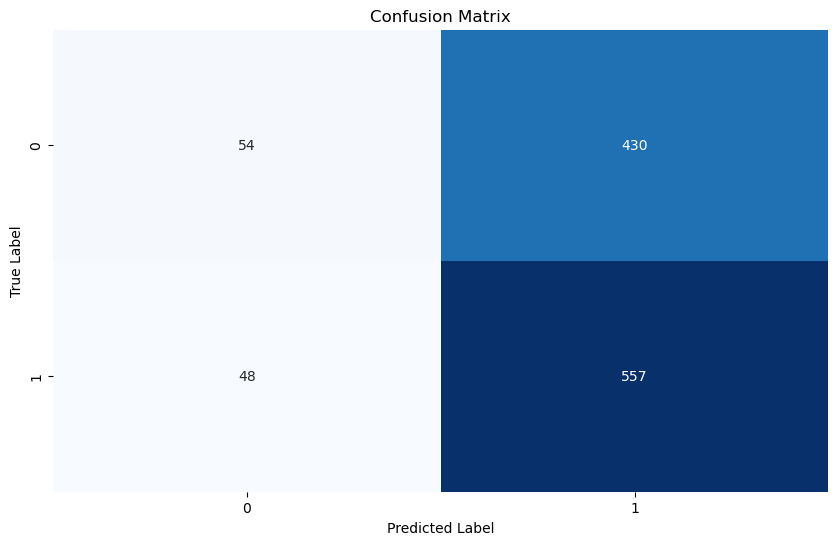

In [6]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [7]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, pos_label='Up')
recall = recall_score(y, y_pred, pos_label='Up')
f1 = f1_score(y, y_pred, pos_label='Up')

In [8]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.5610651974288338
Precision: 0.5643363728470111
Recall: 0.9206611570247933
F1 Score: 0.6997487437185929


Yes, if we check the Accuracy, Precision, Recall and F1 Score, we can tell that each of them larger than 0.5
which is the value of this terms of random guessing, so we can tell that this model beats random guessing model

## 3. On the same graph, plot precision and recall against the threshold (varying over [0, 1]) used to generate predicted labels from predicted probabilities. Explain the pattern you see.

In [9]:
# Plot precision and recall for different thresholds
thresholds = np.arange(0.0, 1., 0.1)
precision_list = []
recall_list = []

for t in thresholds:
    y_pred_threshold = np.where(model.predict_proba(X)[:,1] >= t, "Up", "Down")
    precision_list.append(precision_score(y, y_pred_threshold, pos_label='Up'))
    recall_list.append(recall_score(y, y_pred_threshold, pos_label='Up'))

/Users/yusong/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yusong/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


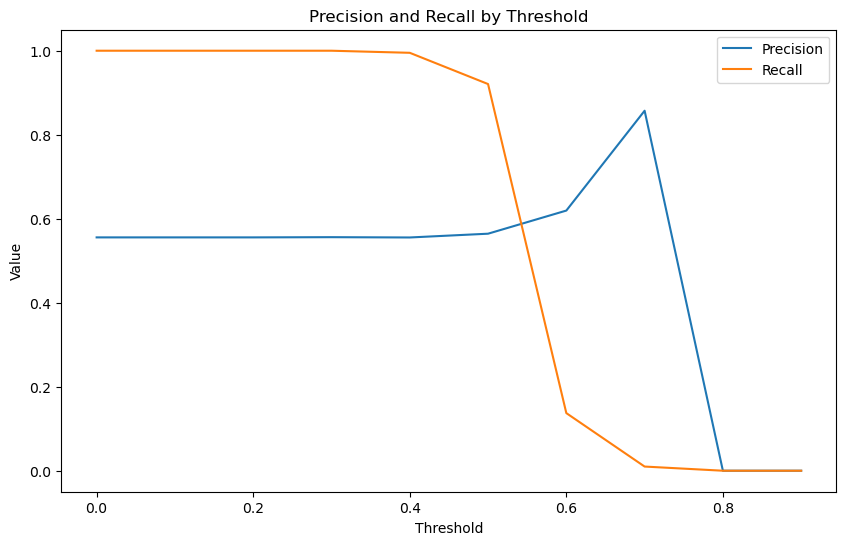

In [10]:
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall by Threshold')
plt.legend()
plt.show()

We can tell from the graph that if the Threshold small enough even close to 0.0, all the prediction will be "up" so the precision will be 1, if the Threshold large enough even close to 1, all the prediction will be "down" so the precision and recall will be 0. Meanwhile, as we increase the threshold, the the recall will decrease, but the precision will first go up then go down, eventually reach 0.

## 4. Now fit the logistic regression using only data up to (and including) the year 2008, with Lag2 as the only predictor.

In [11]:
df_2008 = df[df['Year']<= 2008]
X_2008 = df_2008[['Lag2']]
y_2008 = df_2008['Direction']

In [12]:
model_2008 = LogisticRegression()
model_2008.fit(X_2008, y_2008)

LogisticRegression()

In [13]:
df_after_2008 = df[df['Year']> 2008]
X_after_2008 = df_after_2008[['Lag2']]
y_after_2008 = df_after_2008['Direction']


In [14]:
y_pred_after_2008 = model_2008.predict(X_after_2008)

## 5. Repeat (b) using the remaining observations as a test sample.

In [15]:
conf_matrix_2008 = confusion_matrix(y_after_2008, y_pred_after_2008)
accuracy_2008 = accuracy_score(y_after_2008, y_pred_after_2008)
precision_2008 = precision_score(y_after_2008, y_pred_after_2008, pos_label='Up')
recall_2008 = recall_score(y_after_2008, y_pred_after_2008, pos_label='Up')
f1_2008 = f1_score(y_after_2008, y_pred_after_2008, pos_label='Up')

In [16]:
print('Accuracy:', accuracy_2008)
print('Precision:', precision_2008)
print('Recall:', recall_2008)
print('F1 Score:', f1_2008)

Accuracy: 0.625
Precision: 0.6222222222222222
Recall: 0.9180327868852459
F1 Score: 0.7417218543046358


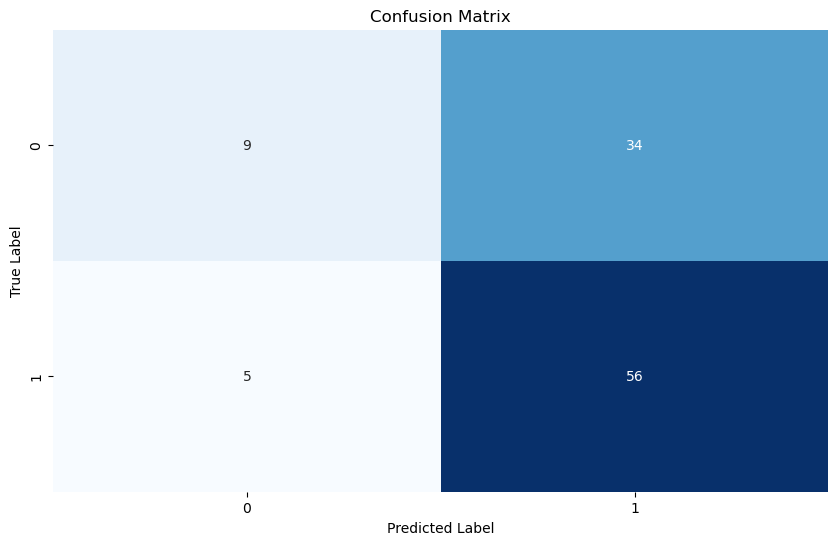

In [17]:
conf_matrix_2008 = confusion_matrix(y_after_2008, y_pred_after_2008)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_2008, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Which of the two fitted models would you use for real-time stock return prediction?

According to the confusion matrix, Accuracy, Precision, Recall and F1-Score we calculate above, we can easily tell that the second model will be a better fit for real world stock return prediction. Becasue we all know that there is an uncommon financial crisis in 2008 and will make the data contain a lot of noise. So the second model will be better.